In [31]:
import pandas as pd
import pandas_datareader as web
import hvplot.pandas
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [32]:
start = '2015-01-01'
end = dt.datetime.now()
test_days = 60

In [33]:
df_btc= web.DataReader('ETH-USD', data_source='yahoo', start=start, end=end)
df_btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-07,3.536610,2.521120,2.831620,2.772120,1.643290e+05,2.772120
2015-08-08,2.798810,0.714725,2.793760,0.753325,6.741880e+05,0.753325
2015-08-09,0.879810,0.629191,0.706136,0.701897,5.321700e+05,0.701897
2015-08-10,0.729854,0.636546,0.713989,0.708448,4.052830e+05,0.708448
2015-08-11,1.131410,0.663235,0.708087,1.067860,1.463100e+06,1.067860
...,...,...,...,...,...,...
2021-12-12,4173.608887,3993.055908,4084.811279,4134.453125,1.405760e+10,4134.453125
2021-12-13,4145.955078,3680.609131,4136.359863,3784.226807,2.399984e+10,3784.226807
2021-12-14,3866.633789,3700.104736,3782.822754,3745.440430,2.383676e+10,3745.440430


In [34]:
bitcoin= df_btc.filter(['Close'])

In [35]:
#transform to an array
bitcoin_data = bitcoin.values
bitcoin.values

array([[2.77212000e+00],
       [7.53324986e-01],
       [7.01897025e-01],
       ...,
       [3.74544043e+03],
       [4.01838867e+03],
       [3.96168457e+03]])

In [36]:
#training data len
training_len= math.ceil(len(bitcoin)*0.8)
training_len

1856

In [37]:
#scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(bitcoin_data)

In [38]:
train_data=scaled_data[:training_len]
train_data

array([[4.85756394e-04],
       [6.61926405e-05],
       [5.55044290e-05],
       ...,
       [8.00633672e-02],
       [8.05973239e-02],
       [6.95863296e-02]])

In [39]:
train_data.shape

(1856, 1)

In [40]:
#create train data
x_train=[]
y_train=[]

for i in range(test_days, len(train_data)):
    x_train.append(train_data[i-test_days:i])
    y_train.append(train_data[i])

In [41]:
print(len(x_train),len(y_train))

1796 1796


In [42]:
x_train

[array([[4.85756394e-04],
        [6.61926405e-05],
        [5.55044290e-05],
        [5.68659087e-05],
        [1.31562078e-04],
        [1.62649111e-04],
        [2.89472475e-04],
        [2.89514048e-04],
        [2.60632076e-04],
        [2.35096157e-04],
        [1.59774825e-04],
        [1.35550303e-04],
        [1.71257376e-04],
        [2.14082590e-04],
        [1.99611465e-04],
        [1.96273736e-04],
        [1.90737164e-04],
        [1.65523372e-04],
        [1.46594335e-04],
        [1.50707278e-04],
        [1.48155118e-04],
        [1.57233095e-04],
        [1.55397952e-04],
        [1.83812319e-04],
        [1.91911406e-04],
        [1.90533488e-04],
        [1.78724673e-04],
        [1.72518901e-04],
        [1.74489118e-04],
        [1.87873284e-04],
        [1.78940811e-04],
        [1.68719784e-04],
        [1.67842745e-04],
        [1.60377529e-04],
        [1.51910606e-04],
        [1.13921149e-04],
        [1.25510110e-04],
        [1.04158400e-04],
        [9.1

In [43]:
#transform to arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
#Reshape as Model needs three dimensional data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1796, 60, 1)

In [45]:
#build model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=20)



Epoch 1/20
1796/1796 [==============================] - 125s 66ms/step - loss: 1.9656e-04
Epoch 2/20
1796/1796 [==============================] - 135s 75ms/step - loss: 1.0345e-04
Epoch 3/20
1796/1796 [==============================] - 112s 62ms/step - loss: 6.7756e-05
Epoch 4/20
1796/1796 [==============================] - 104s 58ms/step - loss: 6.6141e-05
Epoch 5/20
1796/1796 [==============================] - 120s 67ms/step - loss: 4.7494e-05
Epoch 6/20
1796/1796 [==============================] - 122s 68ms/step - loss: 5.1763e-05
Epoch 7/20
1796/1796 [==============================] - 104s 58ms/step - loss: 4.1649e-05
Epoch 8/20
1796/1796 [==============================] - 69s 38ms/step - loss: 4.7834e-05
Epoch 9/20
1796/1796 [==============================] - 69s 38ms/step - loss: 4.2197e-05
Epoch 10/20
1796/1796 [==============================] - 113s 63ms/step - loss: 3.7075e-05
Epoch 11/20
1796/1796 [==============================] - 120s 67ms/step - loss: 4.2334e-05
Epoch 12/2

In [46]:
test_data=scaled_data[training_len - test_days: , :]

In [47]:
#create test data
x_test = []
y_test = bitcoin_data[training_len: , :]

for i in range(test_days, len(test_data)):
    x_test.append(test_data[i-test_days:i])

In [48]:
#reshape to three dimensional data
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [49]:
#predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [50]:
rmse= np.sqrt(np.mean(predictions - y_test)**2)
rmse

279.6266896478061

In [52]:
train = bitcoin[: training_len]

In [53]:
valid = bitcoin[training_len :]
valid

,Close
Date,
2020-09-06,353.362274
2020-09-07,352.673492
2020-09-08,337.602112
2020-09-09,351.110016
2020-09-10,368.101898
...,...
2021-12-12,4134.453125
2021-12-13,3784.226807
2021-12-14,3745.440430


In [54]:
#for plotting
train = bitcoin[: training_len]
valid = bitcoin[training_len :]
valid['Predictions'] = predictions

/var/folders/6p/2n2xjvq90xgcfnx6lv9svb7w0000gn/T/ipykernel_6042/2161862487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [55]:
valid.tail(10)

,Close,Predictions
Date,,
2021-12-07,4315.061523,3100.295654
2021-12-08,4439.357910,3675.454590
2021-12-09,4119.815918,3209.021240
2021-12-10,3908.496094,3221.582520
2021-12-11,4084.452393,2943.654785
2021-12-12,4134.453125,3405.471924
2021-12-13,3784.226807,2953.005615
2021-12-14,3745.440430,2839.438965
2021-12-15,4018.388672,2969.817627


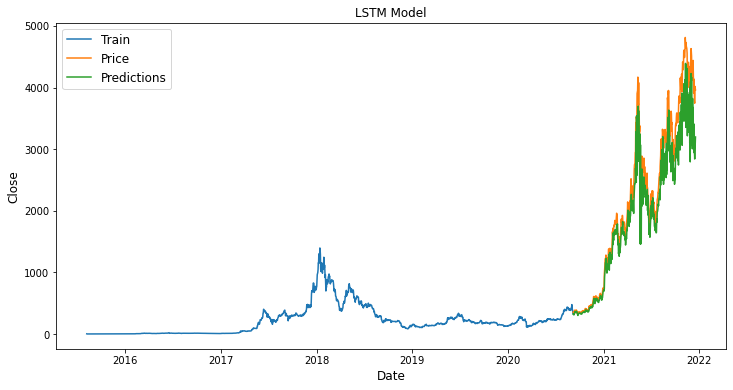

In [62]:
plt.figure(figsize=(12,6))
plt.title('LSTM Model', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Price', 'Predictions'], fontsize=12)


In [57]:
# Printout relevant metrics
#print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions,squared=False))
print("R-squared:", r2_score(y_test, predictions))

Mean Absolute Error: 289.56076444428544
Mean Squared Error: 420.3806459572846
R-squared: 0.8976799226709853
